In [37]:
import numpy as np
import pandas as pd

In [38]:
coordinates = pd.read_csv("./data/VRP-01-CVRP-Coordinates.txt", sep = '\t')
coordinates = coordinates.values#transform to numpy array

#parameters needs to contain:
#Demand: the demand for each client, the deposit has a demand = 0
#TW_early: if the client has a time window, this parameter indicates the earliest time that a vehicle can arrive. 
#TW_late: if the client has a time window, this parameter indicates the latest time that a vehicle can arrive.	
#TW_service_time: arriving at client how much time is needed to the vehicle unload the goods	
#TW_wait_cost: cost/time or penalty/time for a vehicle that spends time waiting to a client to be available.
parameters = pd.read_csv("./data/VRP-01-CVRP-Parameters.txt", sep='\t').values

# pyVRP

In [39]:
#pyvrp
from pyVRP.pyVRP import build_distance_matrix, genetic_algorithm_vrp, plot_tour_coordinates

In [40]:
distance_matrix = build_distance_matrix(coordinates)

In [41]:
#parameters of function: genetic_algorithm_vrp

# genetic_algorithm_vrp(coordinates, distance_matrix, parameters, velocity, fixed_cost, 
#variable_cost, capacity, population_size = 5, vehicle_types = 1, n_depots = 1, route = 'closed', model = 'vrp', 
#time_window = 'without', fleet_size = [], mutation_rate = 0.1, elite = 0, generations = 50, penalty_value = 1000, 
#graph = True, selection = 'rw')

#coordinates, dsitance_matrix: the data is given as former


#Model parameter
##depots number: we will choose the first n rows of the coordinates are considered as depots
##assumption: only has 1 depot
n_depots = 1 

##time_window: without or with. Display whether we have the time_window. If there is a time window, 
##then we allow the time for the car to arrive at the destination and unload to be advanced or delayed
time_window = 'without' 

##route: open or closed.
route       = 'closed'

##model:'tsp', 'mtsp', 'vrp'
model = 'vrp'

##graph: Boolean. If you set True, we will plot the result
##it equals function: plot_tour_coordinates
graph = False


#vehicle parameters:
##vehicle_types: Quantity of Vehicle Types
vehicle_types = 1

##Available Vehicles with different types
fleet_size    = [ 4  ]     

##cost:
fixed_cost    = [ 0  ]     # Fixed Cost
variable_cost = [ 1  ]     # Variable Cost

##velocity:
velocity      = [ 1  ]

##capacity:
capacity      = [6000]

#GA parameters:
## Penalty Value for Violating the Problem Constraints
penalty_value   = 1000
## Population Size     
population_size = 75
## Mutation Rate       
mutation_rate   = 0.10
## Elite Member(s) - Total Number of Best Individual(s) that (is)are Maintained    
elite           = 1
## Number of Generations        
generations     = 2500 

In [42]:
ga_report, ga_vrp = genetic_algorithm_vrp(coordinates, distance_matrix, parameters, velocity, fixed_cost, variable_cost, capacity, population_size, vehicle_types, n_depots, route, model, time_window, fleet_size, mutation_rate, elite, generations, penalty_value, graph)

Generation =  0  Distance =  892.96  f(x) =  3892.96
Generation =  1  Distance =  815.79  f(x) =  2815.79
Generation =  2  Distance =  769.44  f(x) =  1769.44
Generation =  3  Distance =  741.55  f(x) =  1741.55
Generation =  4  Distance =  682.57  f(x) =  682.57
Generation =  5  Distance =  682.57  f(x) =  682.57
Generation =  6  Distance =  669.11  f(x) =  669.11
Generation =  7  Distance =  652.34  f(x) =  652.34
Generation =  8  Distance =  648.63  f(x) =  648.63
Generation =  9  Distance =  611.13  f(x) =  611.13
Generation =  10  Distance =  595.15  f(x) =  595.15
Generation =  11  Distance =  581.08  f(x) =  581.08
Generation =  12  Distance =  570.59  f(x) =  570.59
Generation =  13  Distance =  570.59  f(x) =  570.59
Generation =  14  Distance =  570.59  f(x) =  570.59
Generation =  15  Distance =  570.59  f(x) =  570.59
Generation =  16  Distance =  570.59  f(x) =  570.59
Generation =  17  Distance =  570.59  f(x) =  570.59
Generation =  18  Distance =  561.26  f(x) =  561.26

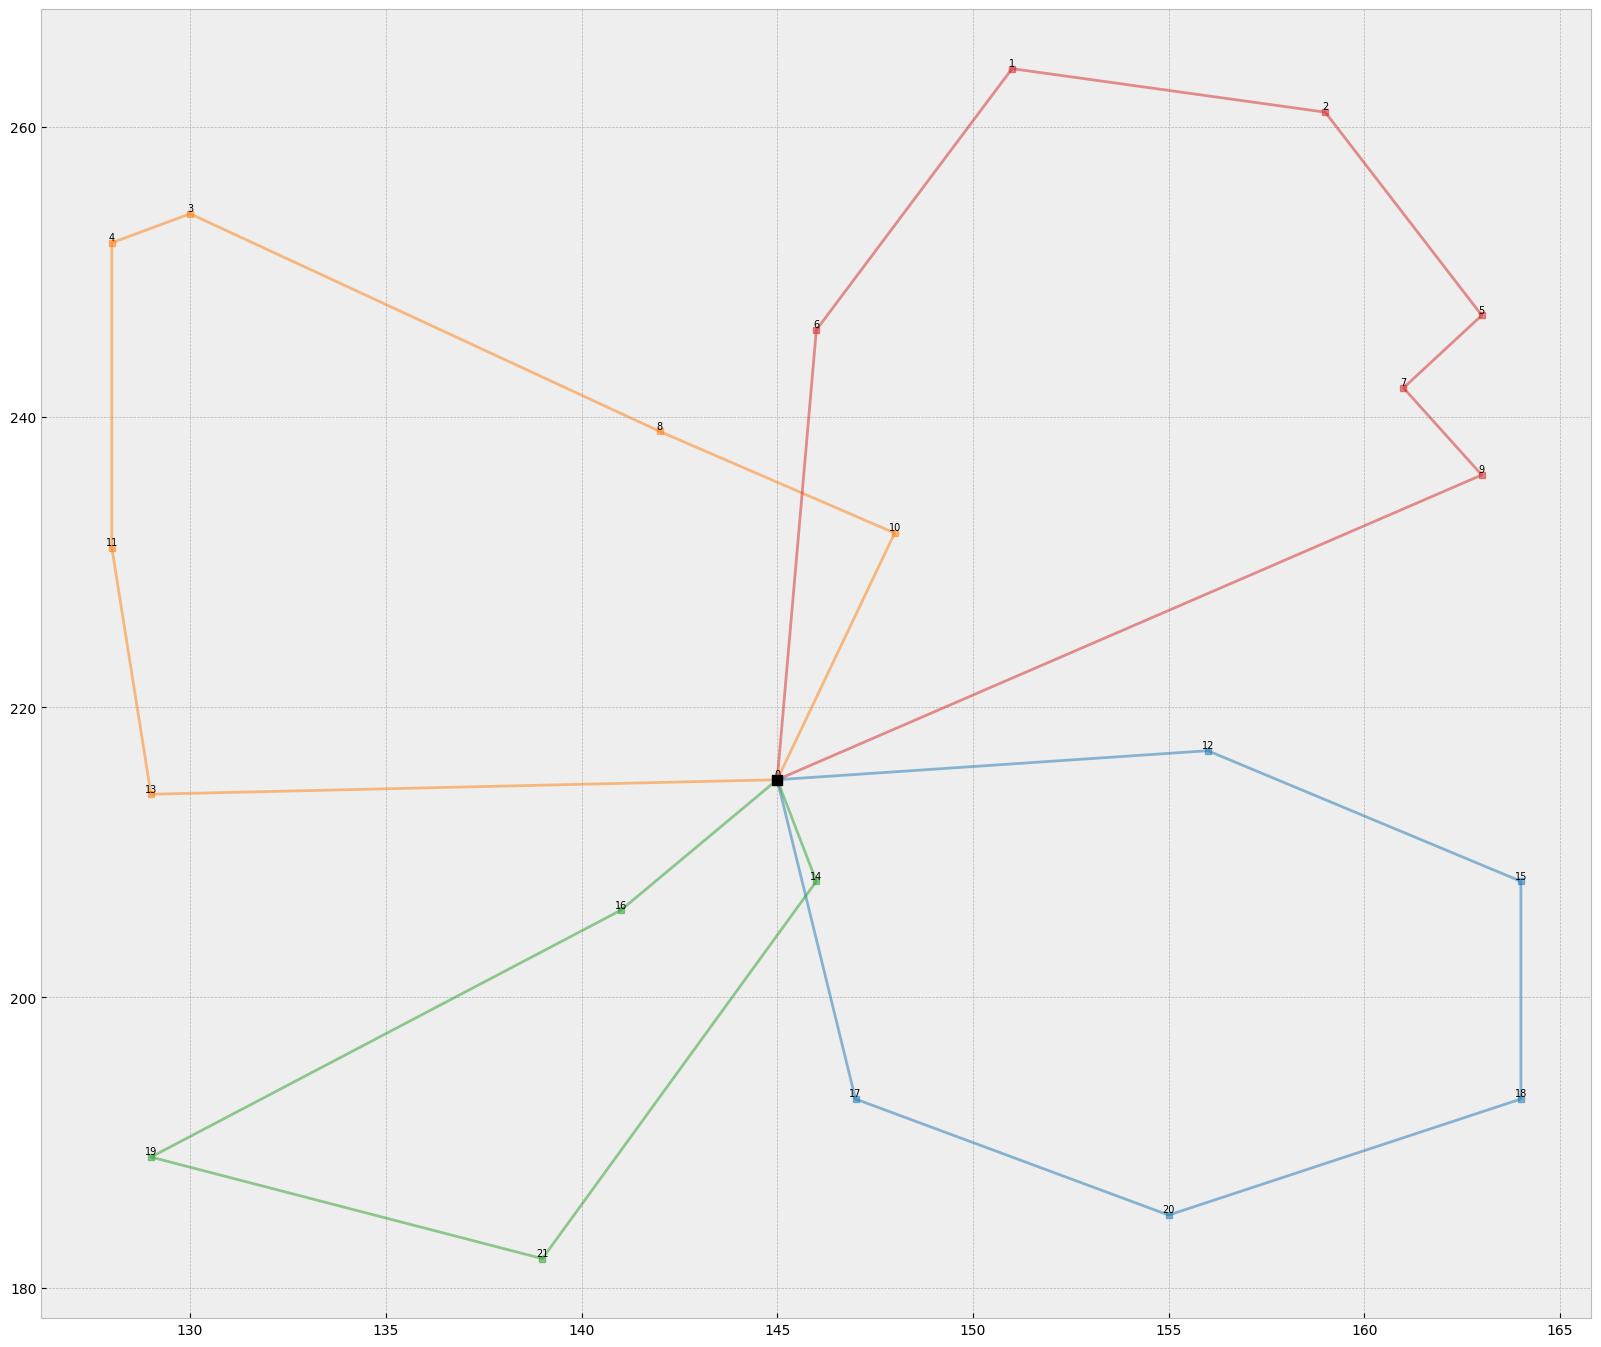

In [47]:
#size_x, size_y：size of figure
plot_tour_coordinates(coordinates, ga_vrp, n_depots = n_depots, route = route, size_x = 20, size_y = 17)

In [10]:
#save report
ga_report.to_csv('./result/VRP-01-Report-withpyVRP.csv', sep = ';', index = False)

# VRPSolverEasy

In [21]:
import VRPSolverEasy
import numpy as np
import pandas as pd

In [22]:
coordinates = pd.read_csv("./data/VRP-01-CVRP-Coordinates.txt", sep = '\t').values
parameters = pd.read_csv("./data/VRP-01-CVRP-Parameters.txt", sep='\t').values

In [23]:
from pyVRP.pyVRP import build_distance_matrix
distance_matrix = build_distance_matrix(coordinates)

In [49]:
model = VRPSolverEasy.Model()
n_rows = coordinates.shape[0]

for id in range(n_rows):
    demand, tw_begin, tw_end, service_time, penalty = parameters[id]
    demand = demand.item()
    tw_begin = tw_begin.item()
    tw_end = tw_end.item()
    service_time = service_time.item()
    penalty = penalty.item()
    if id == 0:
        model.add_depot(id = id, name="depot", service_time=service_time, tw_begin=tw_begin,tw_end = tw_end)
    else:
        model.add_customer(id = id, id_customer = id, name='customer_{}'.format(id), demand=demand, penalty=penalty, service_time = service_time, tw_begin=tw_begin, tw_end = tw_end)


In [50]:
n_rows,n_col = distance_matrix.shape
point_list = model.points
for id_from in range(n_rows):
    distance_data = distance_matrix[id_from]
    name_from = point_list[id_from].name
    for id_to in range(id_from+1, n_col):
        name_to = point_list[id_to].name
        model.add_link(start_point_id=id_from, end_point_id= id_to, name="{}--{}".format(name_from, name_to), is_directed=False, distance=distance_data[id_to])

In [51]:
model.add_vehicle_type(id=1, start_point_id=0, end_point_id=0, name="vehicle1", capacity=6000, max_number=4, fixed_cost=0, var_cost_dist=1)

In [52]:
model.set_parameters(solver_name="CLP")

In [53]:
model.solve()

In [54]:
model.solution.is_defined()

True

In [55]:
print(model.solution)


Solution cost : 375.2797871556646 
 
Route for vehicle 1:
 ID : 0 --> 10 --> 8 --> 3 --> 4 --> 11 --> 13 --> 0
 Name : depot --> customer_10 --> customer_8 --> customer_3 --> customer_4 --> customer_11 --> customer_13 --> depot
 Load : 0.0 --> 600.0 --> 700.0 --> 1500.0 --> 2900.0 --> 4100.0 --> 5400.0 --> 5400.0
Total cost : 102.5806267037775
 
Route for vehicle 1:
 ID : 0 --> 12 --> 15 --> 18 --> 20 --> 17 --> 0
 Name : depot --> customer_12 --> customer_15 --> customer_18 --> customer_20 --> customer_17 --> depot
 Load : 0.0 --> 1300.0 --> 2200.0 --> 3100.0 --> 4900.0 --> 5900.0 --> 5900.0
Total cost : 83.66795957844282
 
Route for vehicle 1:
 ID : 0 --> 14 --> 21 --> 19 --> 16 --> 0
 Name : depot --> customer_14 --> customer_21 --> customer_19 --> customer_16 --> depot
 Load : 0.0 --> 300.0 --> 1000.0 --> 3500.0 --> 5600.0 --> 5600.0
Total cost : 76.86095731175261
 
Route for vehicle 1:
 ID : 0 --> 9 --> 7 --> 5 --> 2 --> 1 --> 6 --> 0
 Name : depot --> customer_9 --> customer_7 -

In [63]:
model.solution.routes[0].point_ids

[0, 10, 8, 3, 4, 11, 13, 0]

In [71]:
# draw the result
from itertools import cycle
from matplotlib import pyplot as plt

#solution needs model.solution from VRPSolver
#route_type: string. closed or open
def plot_tour_coordinates (coordinates, solution:VRPSolverEasy.Solution, n_depots, route_type, size_x = 10, size_y = 10):
    routes = solution.routes
    depot     = [[routes[r_index].point_ids[0]] for r_index in range(len(routes))]
    city_tour = [routes[r_index].point_ids[1:-1] for r_index in range(len(routes))]
    cycol     = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#bf77f6', '#ff9408', 
                       '#d1ffbd', '#c85a53', '#3a18b1', '#ff796c', '#04d8b2', '#ffb07c', '#aaa662', '#0485d1', '#fffe7a', '#b0dd16', '#d85679', '#12e193', 
                       '#82cafc', '#ac9362', '#f8481c', '#c292a1', '#c0fa8b', '#ca7b80', '#f4d054', '#fbdd7e', '#ffff7e', '#cd7584', '#f9bc08', '#c7c10c'])
    plt.figure(figsize = [size_x, size_y])
    for j in range(0, len(city_tour)):
        if (route_type == 'closed'):
            xy = np.zeros((len(city_tour[j]) + 2, 2))
        else:
            xy = np.zeros((len(city_tour[j]) + 1, 2))
        for i in range(0, xy.shape[0]):
            if (i == 0):
                xy[ i, 0] = coordinates[depot[j][i], 0]
                xy[ i, 1] = coordinates[depot[j][i], 1]
                if (route_type == 'closed'):
                    xy[-1, 0] = coordinates[depot[j][i], 0]
                    xy[-1, 1] = coordinates[depot[j][i], 1]
            if (i > 0 and i < len(city_tour[j])+1):
                xy[i, 0] = coordinates[city_tour[j][i-1], 0]
                xy[i, 1] = coordinates[city_tour[j][i-1], 1]
        plt.plot(xy[:,0], xy[:,1], marker = 's', alpha = 0.5, markersize = 5, color = next(cycol))
    for i in range(0, coordinates.shape[0]):
        if (i < n_depots):
            plt.plot(coordinates[i,0], coordinates[i,1], marker = 's', alpha = 1.0, markersize = 7, color = 'k')[0]
            plt.text(coordinates[i,0], coordinates[i,1] + 0.04, i, ha = 'center', va = 'bottom', color = 'k', fontsize = 7)
        else:
            plt.text(coordinates[i,0],  coordinates[i,1] + 0.04, i, ha = 'center', va = 'bottom', color = 'k', fontsize = 7)
    return

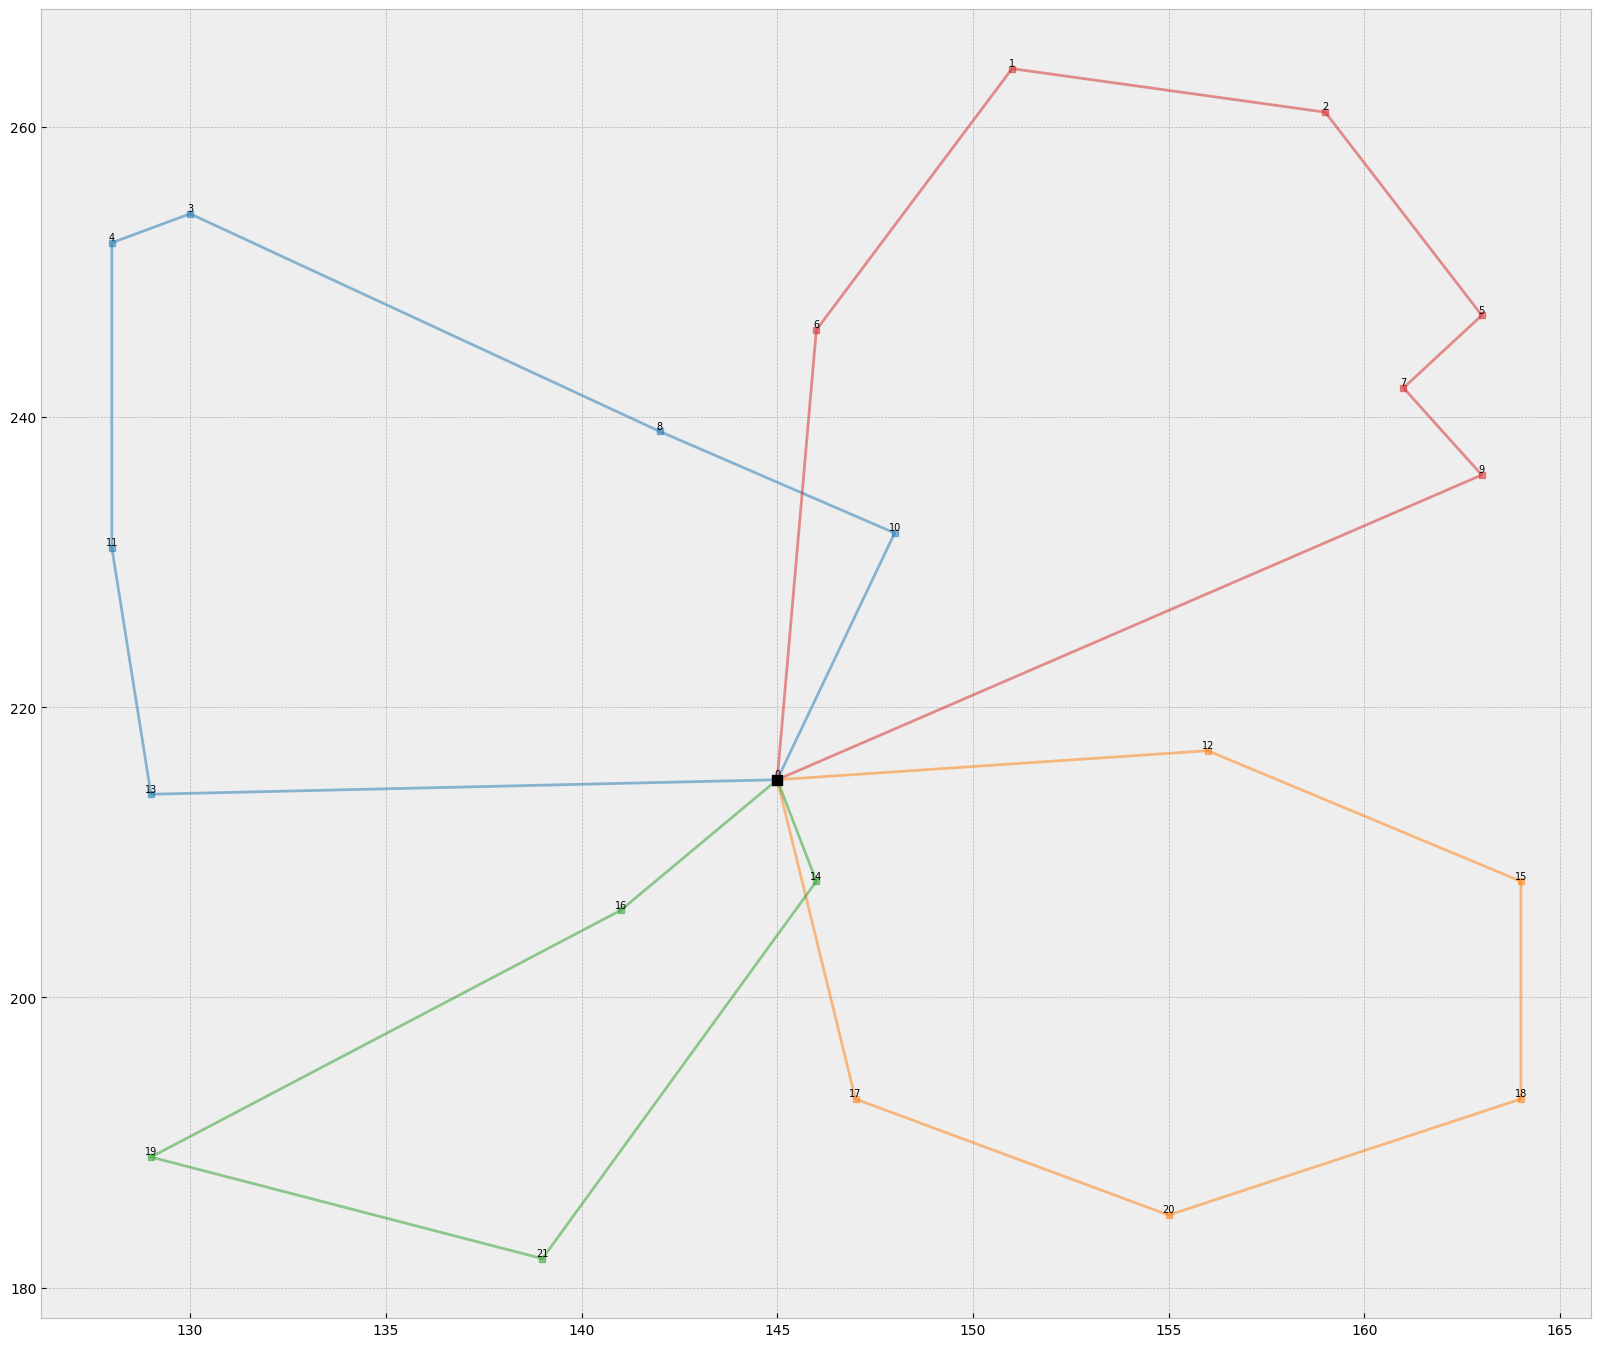

In [72]:
plot_tour_coordinates(coordinates=coordinates, solution=model.solution, n_depots=1, route_type='closed', size_x=20, size_y = 17)